# Exploratory Data Analysis

In [13]:
import numpy as np
import pandas as pd

from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

## Weather

In [4]:
# Load data
df = pd.read_csv("data/weather.csv")

# Check head
df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
# check columns
print df.columns.values

['Station' 'Date' 'Tmax' 'Tmin' 'Tavg' 'Depart' 'DewPoint' 'WetBulb' 'Heat'
 'Cool' 'Sunrise' 'Sunset' 'CodeSum' 'Depth' 'Water1' 'SnowFall'
 'PrecipTotal' 'StnPressure' 'SeaLevel' 'ResultSpeed' 'ResultDir'
 'AvgSpeed']


In [6]:
# check counts
df.count()

Station        2944
Date           2944
Tmax           2944
Tmin           2944
Tavg           2944
Depart         2944
DewPoint       2944
WetBulb        2944
Heat           2944
Cool           2944
Sunrise        2944
Sunset         2944
CodeSum        2944
Depth          2944
Water1         2944
SnowFall       2944
PrecipTotal    2944
StnPressure    2944
SeaLevel       2944
ResultSpeed    2944
ResultDir      2944
AvgSpeed       2944
dtype: int64

In [7]:
# Check counts for missing values in each column
print df.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


In [8]:
# Get summary statistics for data
df.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [41]:
data = pd.DataFrame(df, columns = ['Date', 'Tmax'])
data

,Date,Tmax
0,2007-05-01,83
1,2007-05-01,84
2,2007-05-02,59
3,2007-05-02,60
4,2007-05-03,66
5,2007-05-03,67
6,2007-05-04,66
7,2007-05-04,78
8,2007-05-05,66
9,2007-05-05,66


In [60]:
# Check data types
print df.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


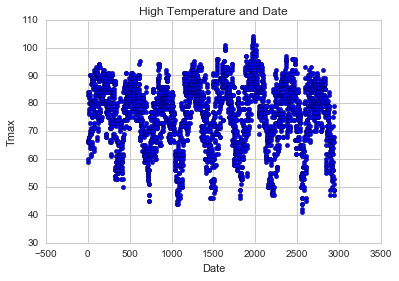

In [70]:
# scatter plot of date vs. Tmax
plt.scatter(df.index.values, df['Tmax'])
plt.xlabel('Date')
plt.ylabel('Tmax')
plt.title('High Temperature and Date')

## GIS (Spraying data)

In [72]:
# load spray data
spray_data = pd.read_csv("data/spray.csv")

In [73]:
spray_data.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [74]:
spray_data.count()

Date         14835
Time         14251
Latitude     14835
Longitude    14835
dtype: int64

In [75]:
# Check counts for missing values in each column
print spray_data.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


In [76]:
# create aa function to handle missing data

def wrangler(df):
    if df.isnull().sum().sum():
        print "There are missing values"
        df = df.dropna()
        print "Missing values dropped"
    
    return df

In [77]:
spray_data = wrangler(spray_data)

There are missing values
Missing values dropped


In [78]:
# check for missing values in each column after dropping
print "Missing values:"
print spray_data.isnull().sum()

Missing values:
Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64


In [79]:
spray_data.count()

Date         14251
Time         14251
Latitude     14251
Longitude    14251
dtype: int64

## Main Dataset

In [80]:
# load main data_set
main_data = pd.read_csv("data/train.csv")

In [81]:
main_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [82]:
# get a count to see if anything is missing
main_data.count()

Date                      10506
Address                   10506
Species                   10506
Block                     10506
Street                    10506
Trap                      10506
AddressNumberAndStreet    10506
Latitude                  10506
Longitude                 10506
AddressAccuracy           10506
NumMosquitos              10506
WnvPresent                10506
dtype: int64